In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import missingno as mi
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.anova import anova_lm
import random
from statsmodels.formula.api import ols
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import statistics
from sklearn.metrics import confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap
from datetime import date

import pandas as pd
import numpy as np

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex

import re

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import GridSearchCV, KFold

import xgboost as xgb
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

## QUESTION 1 <a class="anchor" id="first-bullet"></a>

In [153]:
data = pd.read_csv('assignment4.csv')

In [154]:
### head data ###

data.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [155]:
### description of the data ###

data.describe()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,115.036951,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.250000,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,198.500000,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,297.750000,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [156]:
### data types ###

data.dtypes

Unnamed: 0        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [157]:
data['origin'].unique()

array([1, 3, 2])

In [158]:
### correlation matrix ###

data.corr()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
Unnamed: 0,1.000000,0.585131,-0.363040,-0.386976,-0.419873,-0.318869,0.287634,0.996800,0.199702
mpg,0.585131,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.363040,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.386976,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.419873,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.318869,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.287634,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.996800,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.199702,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


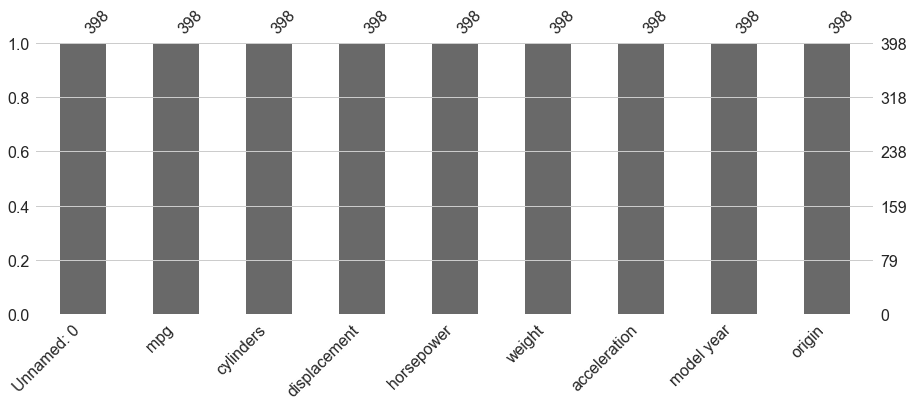

In [159]:
### null values ###

print(mi.bar(data, figsize = (15,5)))

### there are no null values in the data ###

In [160]:
### columns in the data frame ###

data.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year', 'origin'],
      dtype='object')

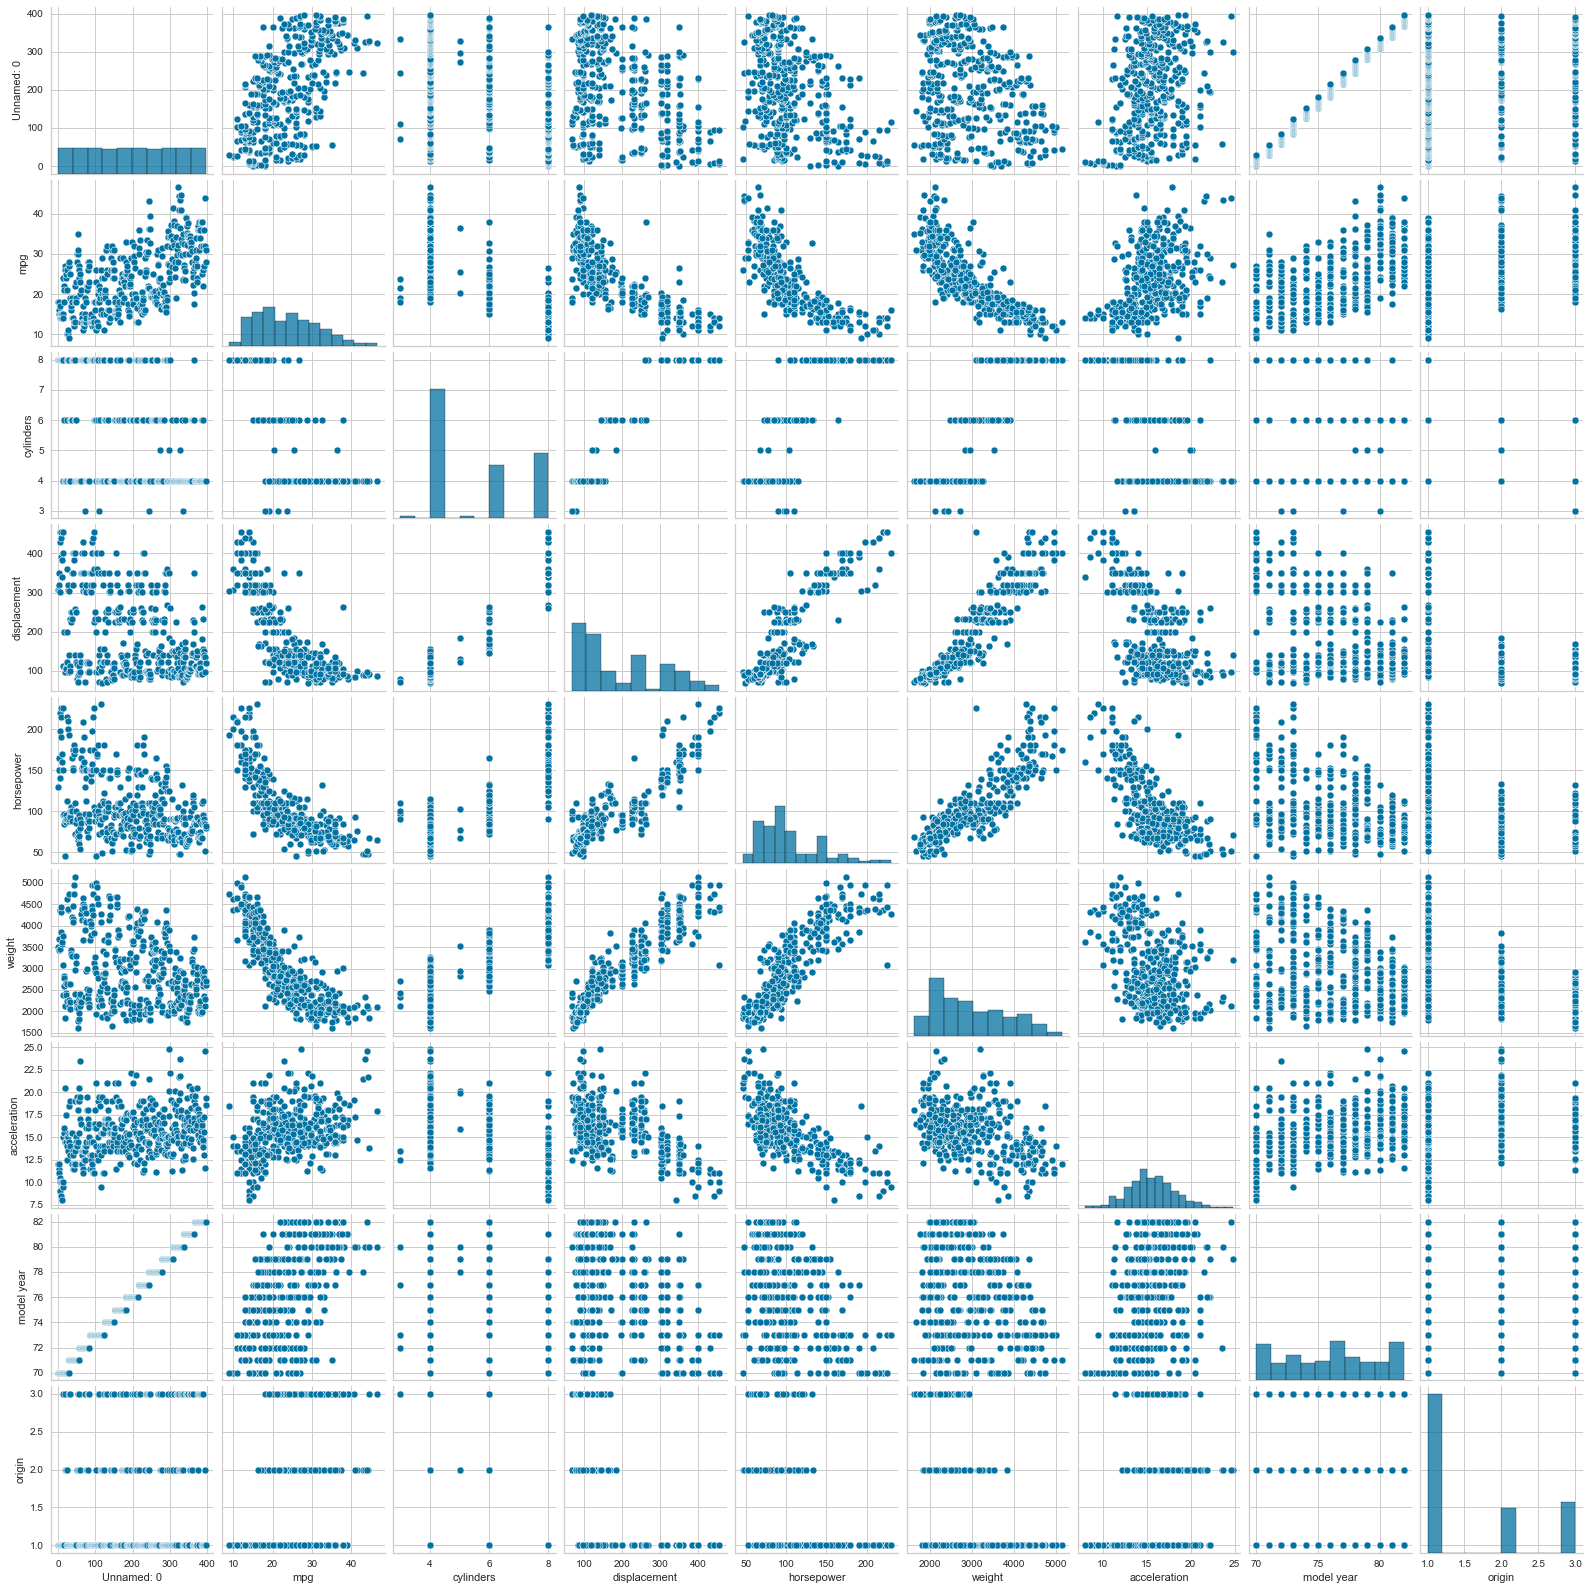

In [161]:
### scatter plot ###

sns.pairplot(data)

There is chance of multicolinearity but as the question has not specifically asked to check for multi-colinearity, 
we will not worry about it.

In [162]:
### standardizing the columns ###

numeric_cols = [ 'mpg','displacement', 'horsepower', 'weight', 'acceleration']

# Dataset 1
scaler1 = StandardScaler().fit(data[numeric_cols]) 
data[numeric_cols] = scaler1.transform(data[numeric_cols])

data = data.drop(['Unnamed: 0'], axis = 1)

In [163]:
### converting origin into dummy variable ###

data['origin'].unique()
data['origin'] = data['origin'].astype(str)

df_dummy = pd.get_dummies(data['origin'])
df_dummy.drop("3",axis = 1, inplace = True)
df_dummy.rename(columns={"1": "Origin1", "2": "Origin2"},inplace=True)

data.drop('origin',axis = 1, inplace=True)

data = pd.concat([data, df_dummy], axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Origin1,Origin2
0,-0.706439,8,1.090604,0.673118,0.630870,-1.295498,70,1,0
1,-1.090751,8,1.503514,1.589958,0.854333,-1.477038,70,1,0
2,-0.706439,8,1.196232,1.197027,0.550470,-1.658577,70,1,0
3,-0.962647,8,1.061796,1.197027,0.546923,-1.295498,70,1,0
4,-0.834543,8,1.042591,0.935072,0.565841,-1.840117,70,1,0
...,...,...,...,...,...,...,...,...,...
393,0.446497,4,-0.513026,-0.479482,-0.213324,0.011586,82,1,0
394,2.624265,4,-0.925936,-1.370127,-0.993671,3.279296,82,0,1
395,1.087017,4,-0.561039,-0.531873,-0.798585,-1.440730,82,1,0
396,0.574601,4,-0.705077,-0.662850,-0.408411,1.100822,82,1,0


In [164]:
#### lasso model 20% testing set model ####


X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 3)

clf1 = linear_model.Lasso(alpha=0.1, max_iter = 10000)
clf1.fit(X_train, y_train)

print("**** Coefficients ****")
print(clf1.coef_)
print("\n")
print("**** Intercept ****")
print(clf1.intercept_)
print("\n")
print("**** Predicted values ****")
print(clf1.predict(X_test))
print("\n")
print("**** Scores ****")
print("The in-sample model score = {}".format(clf1.score(X_train, y_train, sample_weight=None)))

**** Coefficients ****
[-0.09468655 -0.         -0.         -0.47210027  0.          0.09259454
 -0.          0.        ]


**** Intercept ****
-6.51949278645758


**** Predicted values ****
[ 0.78914757 -0.49635318 -0.5032193   0.14948697  0.22980144  0.68669828
  0.46601024  0.35367902 -1.13804882  0.43074808  0.38856323 -0.81400003
 -0.32599789 -0.93450383 -0.24772358 -0.43967507 -0.6906658   0.24276808
  1.1519679   1.12176171 -0.79328299  0.57834617 -0.5292861  -1.36342722
 -0.26459752  0.18409445 -0.02786283  0.42566022 -0.60489787 -0.42602185
  0.67255107 -1.0783872   0.83429637  0.97062193  0.02780261  0.80031127
  0.21642967  1.21336827 -0.51159208  0.98401837  0.09038354  0.25442578
 -0.44323672  0.7157881   0.77929282 -1.2474531   0.69135634 -0.18235173
  0.79522341  1.16641652  0.92869385  1.25293522  0.45702742 -1.58328797
 -1.00178745  0.31030848 -0.49989487 -0.23698968  1.07152505 -1.23957432
  0.80874824  0.46162129  0.68620429 -0.65491727  0.86499655 -0.74192996
 -0.52

In [165]:
print("The model score = {}".format(clf1.score(X_test, y_test, sample_weight=None)))

The model score = 0.7874375297117333


In [166]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf1.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -485.940574258827, -455.84416319658555 and -485.4745548413513


In [167]:
#### lasso model 80% testing set model ####


X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state = 4)

clf2 = linear_model.Lasso(alpha=0.1, max_iter = 10000)
clf2.fit(X_train, y_train)

print("**** Coefficients ****")
print(clf2.coef_)
print("\n")
print("**** Intercept ****")
print(clf2.intercept_)
print("\n")
print("**** Predicted values ****")
print(clf2.predict(X_test))
print("\n")
print("**** Scores ****")
print("The in-sample model score = {}".format(clf1.score(X_train, y_train, sample_weight=None)))

**** Coefficients ****
[-0.09822039 -0.         -0.         -0.5078197   0.          0.08534973
 -0.          0.        ]


**** Intercept ****
-5.87723901401489


**** Predicted values ****
[ 1.04315962 -1.51924461  0.32202548  1.15973108 -0.26639773  0.45646104
  1.23058038  1.21515031 -0.16756761  0.38999547  0.93508442 -0.59380622
 -1.38937356  0.66018347 -0.84890715  0.57987591 -1.07193335 -1.26859919
  0.47203953 -0.93906022  0.70605404 -1.23968873  0.06366503 -0.08521997
 -0.71654404  0.19868724  0.55336713  0.59713961 -1.07115213  0.61109763
  0.74082026 -0.29849107 -0.63736552  0.22055487  1.05405755  0.02190698
  1.03373374  0.04687194  0.35925138 -0.75791485  1.3699677   0.65844024
  0.1539085  -0.54790327 -1.67595365  0.63358429  1.19584654 -0.67193232
  0.96639655  0.4710381   0.53829866  0.03830837 -0.34246999 -1.21705366
  0.78969292 -0.94317275  0.7515954   0.39767812  1.12910977  1.08990181
  1.1641148  -0.00494479 -0.03145357 -0.19030686 -0.68807181 -0.27865867
 -1.43

In [168]:
print("The model score = {}".format(clf2.score(X_test, y_test, sample_weight=None)))

The model score = 0.7925399502338571


In [169]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf2.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -110.92532645236723, -91.96974363263107 and -108.86818359522437


## QUESTION 2 <a class="anchor" id="first-bullet"></a>

### Using BIC to calculate value of alpha ###

The score for the 80-20 training and test split is higher for the 20-80 training and test split. 

In [170]:
### using BIC to predict the alpha value for 20% testing data ###


X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 10)

clf3 = linear_model.LassoLarsIC(criterion='bic', normalize=False)
clf3.fit(X_train, y_train)

clf3.predict(X_test)

array([ 1.05508684,  0.45750279,  1.10097826,  0.66730282,  0.33221556,
        1.36869306,  0.19290206, -0.75610721,  0.61213845,  0.22400525,
        0.0810524 ,  0.52423164,  1.37221406,  0.32841177, -0.35883386,
        0.40698504, -0.29370099, -1.31923733, -1.84891498,  0.90732292,
       -0.71011193, -1.59375747,  1.26294454,  0.07742753,  0.63398316,
        0.05066206,  0.18986305,  0.04562014,  0.93560931,  0.90744126,
       -1.2025766 , -1.6680536 ,  0.62152974, -1.68354603,  1.27338922,
        0.29747885,  1.20660844, -0.80540129, -0.4350001 , -1.35984432,
        0.58608301,  0.87927321, -0.99741737, -0.71433713,  1.12186762,
        0.70157201, -0.22197633, -0.98133326,  0.82997912, -1.25046228,
       -0.40636453, -0.23969969,  0.32765563, -0.51692412,  1.36165104,
        1.11482561, -0.09744239, -1.16278632,  0.97386703,  0.66037915,
        0.23656253,  0.01369441,  1.2628262 , -0.79471994,  0.91753093,
       -0.49167674, -0.13794553, -0.38406094, -1.15234164,  0.20

In [171]:
#### value of alpha ###

alpha = clf3.alpha_

print("*** value of alpha ***")
print(alpha)
print("\n")
print("*** creating the model ***")

clf3 = linear_model.Lasso(alpha=alpha, max_iter = 10000)
clf3.fit(X_train, y_train)

print("The model score = {}".format(clf3.score(X_test, y_test, sample_weight=None)))

*** value of alpha ***
0.05529954573738531


*** creating the model ***
The model score = 0.7873753642671888


In [172]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf3.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -510.5477931723067, -480.45138211006525 and -510.081773754831


In [173]:
### using BIC to predict the alpha value for 80% testing data ###


X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state = 11)

clf4 = linear_model.LassoLarsIC(criterion='bic', normalize=False)
clf4.fit(X_train, y_train)

clf4.predict(X_test)

array([ 0.76550456,  0.67783629,  0.3271632 ,  0.85317284, -0.98842441,
       -1.07609269,  0.67783629, -0.11117817,  0.94084111, -0.7254196 ,
        0.23949493,  0.50249975, -0.37446474,  0.85317284, -0.1991282 ,
        0.94084111,  0.50249975,  0.67783629,  0.23921317, -0.81308787,
        0.85317284,  0.94084111, -0.11117817, -0.1991282 ,  0.23949493,
        0.15154489,  0.41483147,  0.76550456,  0.41483147,  0.80947958,
        0.50249975,  0.3271632 , -0.55008305,  0.85317284,  0.06415838,
       -0.55008305,  0.41483147, -0.37446474, -0.63775132,  0.50249975,
        0.41483147, -0.90075614, -0.28679647,  0.23949493, -0.63775132,
        0.94084111,  0.94084111, -1.25142923, -0.46213302, -1.07609269,
       -0.28679647, -0.55008305, -1.16376096,  0.37085646,  0.85317284,
       -0.28679647, -0.11117817,  0.94084111,  0.32688144, -1.07609269,
       -0.28679647,  0.76550456,  0.23921317, -0.02350989,  0.94084111,
       -1.25142923, -0.72513784, -0.28679647, -0.81308787, -0.55

In [174]:
#### value of alpha ###

alpha = clf4.alpha_

print("*** value of alpha ***")
print(alpha)
print("\n")
print("*** creating the model ***")

clf4 = linear_model.Lasso(alpha=alpha, max_iter = 10000)
clf4.fit(X_train, y_train)

print("The model score = {}".format(clf4.score(X_test, y_test, sample_weight=None)))

*** value of alpha ***
0.27052609427825813


*** creating the model ***
The model score = 0.6861454033745178


In [175]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf4.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -79.25609739534819, -60.30051457561202 and -77.19895453820533


In [176]:
### Using AIC to calculate value of alpha 20% testing data ###

X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 12)

clf5 = linear_model.LassoLarsIC(criterion='aic', normalize=False)
clf5.fit(X_train, y_train)

clf5.predict(X_test)

array([ 0.90578986,  0.50066366,  0.09459897, -1.25290594, -0.85626067,
       -0.24246454, -1.73160509,  0.3436098 ,  0.87932356, -0.97197511,
       -1.90236654, -1.47462065, -0.02552735,  0.18414301,  0.96508637,
        0.04892319,  0.68977982,  0.73857649, -0.59741573,  0.85060882,
       -1.03378732,  0.66033525,  0.43568153,  0.48596234,  0.79716352,
        1.29019673,  0.59177165, -0.94705804, -1.00110849, -0.60353314,
       -0.82566094, -1.76389225,  0.95838716,  0.91229027,  1.10065002,
        0.92244956, -1.10831686, -0.37812441,  1.55917581,  0.27462554,
       -1.31778393, -0.796759  ,  1.54979325,  0.02129187, -0.41731727,
       -1.05296025,  0.02593769,  0.29156113, -0.77098126,  0.94226868,
        0.76975611,  1.30309745,  0.77348531, -0.09782742, -0.4984442 ,
        0.66869574, -0.24312271,  0.26459686,  0.05620557,  0.08945871,
        0.29679057,  1.4126412 ,  0.4129054 ,  1.21836451, -1.25868447,
       -0.02047526, -2.09805546, -1.2558939 , -0.39746989, -1.61

In [177]:
#### value of alpha ###

alpha = clf5.alpha_

print("*** value of alpha ***")
print(alpha)
print("\n")
print("*** creating the model ***")

clf5 = linear_model.Lasso(alpha=alpha, max_iter = 10000)
clf5.fit(X_train, y_train)

print("The model score = {}".format(clf5.score(X_test, y_test, sample_weight=None)))

*** value of alpha ***
0.008166740662923784


*** creating the model ***
The model score = 0.8515269324409062


In [178]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf5.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -512.1942994362875, -482.097888374046 and -511.72828001881174


In [179]:
### Using AIC to calculate value of alpha 80% testing data ###


X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state = 13)

clf6 = linear_model.LassoLarsIC(criterion='aic', normalize=False)
clf6.fit(X_train, y_train)

clf6.predict(X_test)

array([ 0.82748056,  0.45750594, -0.46077987, -2.02771467, -1.69851304,
        1.32441178,  0.04727188, -2.00332996, -2.30245511,  1.22964124,
        0.68989498,  1.16670115,  0.06840405, -2.05301149,  0.71971858,
        0.94927007, -1.40187233,  0.02560967,  0.56785945,  0.15828399,
        0.03545358, -0.74734996,  0.72733326, -0.79944717,  0.20615186,
        1.17017663, -0.35591758,  0.58876142, -0.50897653,  0.54894817,
        0.93605188,  0.18770509,  0.62627579,  1.15563275, -0.05142906,
       -0.09955597,  0.11815201, -0.35821361, -1.13819343, -1.18949875,
        1.28341274, -0.25397826,  0.68883827,  0.13821419, -0.4656315 ,
       -0.7855746 ,  0.5917397 , -1.19825326,  0.56903746, -0.23583143,
       -0.1301392 ,  0.88626895,  0.89210243,  0.36224883, -1.33478543,
        0.26813169,  1.45491473,  1.29416474, -0.35413696,  1.24897712,
       -0.30868065, -0.74297243,  0.4585758 ,  0.24627098, -0.90976318,
        0.41612368, -1.26746655, -1.51968403, -0.33840402,  0.11

In [180]:
#### value of alpha ###

alpha = clf6.alpha_

print("*** value of alpha ***")
print(alpha)
print("\n")
print("*** creating the model ***")

clf6 = linear_model.Lasso(alpha=alpha, max_iter = 10000)
clf6.fit(X_train, y_train)

print("The model score = {}".format(clf6.score(X_test, y_test, sample_weight=None)))

*** value of alpha ***
0.010179096322233969


*** creating the model ***
The model score = 0.8008189767653637


In [181]:
### calculating AIC, BIC and AICc for the models ###

n = len(list(X_train.index))
k = len(list(X_train.columns))

rss = sum((y_train - clf1.predict(X_train))**2)
AIC = 2*k + n*np.log(rss/n)
BIC = k*np.log(n) + n*np.log(rss/n)
const = (2*k*k + 2*k)/(n - k - 1)
AICC = AIC + const
print("The AIC, BIC and AICC values are correspondinlgy: {}, {} and {}".format(AIC, BIC, AICC))

The AIC, BIC and AICC values are correspondinlgy: -102.47152198266991, -83.51593916293373 and -100.41437912552706


#### Using AICc to calculate the value of alpha ####

The theorem of finding the optimal alpha is using Lasso Regression to fit the training data based on a series alpha, chooseing the alpha with the least AIC/AICc/BIC. 

In [182]:
### number of data points ###

rows = len(list(data.index))
print(rows)

398


In [183]:
### number of features ###

k = len(list(data.columns))
print(k)

9


We know that AICc = AIC + const 
const = (2k^2 + 2k)/(n-k-1)
calculating the value of constant:

In [184]:
const = (2*k*k + 2*k)/(rows - k - 1)

### Using AICc criterion to calculate the optimal value of alpha for 20% test ###

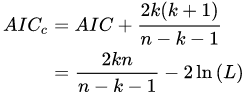

In [185]:
X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 14)

In [186]:
lasso_AIC = linear_model.LassoLarsIC(criterion="aic", normalize=False).fit(X_train, y_train)

In [187]:
# Function 1 --- generate Information Criteria table
def table_ic(X,y):
    summary = pd.DataFrame({
            "alphas": lasso_AIC.alphas_,
            "AICc criterion": lasso_AIC.criterion_+const,
        }).set_index("alphas")
    
    alpha_AICc = summary.index[summary['AICc criterion']==summary['AICc criterion'].min()].values[0]
    
    print("Optimal alpha of lasso based on the AICc is: ",alpha_AICc)

    return summary

In [188]:
def plot_ic(table):
    ax = table.plot()

    ax.vlines(
        lasso_AIC.alpha_,
        table["AICc criterion"].min(),
        table["AICc criterion"].max(),
        label="alpha: AICc estimate",
        linestyle="--",
        color="tab:green",
    )


    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("criterion")
    ax.set_xscale("log")
    ax.legend(loc="upper center")
    ax.set_title("Information-criterion for model selection")

In [189]:
table_ic(X_train, y_train)

Optimal alpha of lasso based on the AICc is:  0.016080721054814173


,AICc criterion
alphas,
2.091410,318.463918
1.161684,249.460327
0.305818,108.835607
0.041512,65.868681
0.021550,63.657138
0.016081,63.368844
0.008066,65.070666
0.004680,66.204330
0.003544,67.997430


Optimal alpha of lasso based on the AICc is:  0.016080721054814173


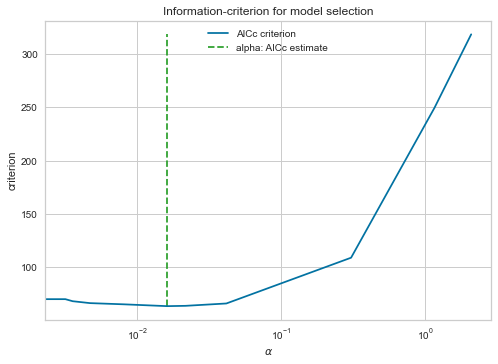

In [190]:
plot_ic(table_ic(X_train, y_train))

In [191]:


clf9 = linear_model.Lasso(alpha=0.016080721054814406, max_iter = 10000)
clf9.fit(X_train, y_train)

print("The model score for AICc optimal alpha and for 20% test data = {}".format(clf9.score(X_test, y_test, sample_weight=None)))

The model score for AICc optimal alpha and for 20% test data = 0.7976216344831861


### Using AICc criterion to calculate the optimal value of alpha for 80% test ###

In [192]:
X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state = 15)

In [193]:
lasso_AIC = linear_model.LassoLarsIC(criterion="aic", normalize=False).fit(X_train, y_train)

In [194]:
def table_ic(X,y):
    summary = pd.DataFrame({
            "alphas": lasso_AIC.alphas_,
            "AICc criterion": lasso_AIC.criterion_+const,
        }).set_index("alphas")
    
    alpha_AICc = summary.index[summary['AICc criterion']==summary['AICc criterion'].min()].values[0]
    
    print("Optimal alpha of lasso based on the AICc is: ",alpha_AICc)

    return summary

In [195]:
def plot_ic(table):
    ax = table.plot()

    ax.vlines(
        lasso_AIC.alpha_,
        table["AICc criterion"].min(),
        table["AICc criterion"].max(),
        label="alpha: AICc estimate",
        linestyle="--",
        color="tab:green",
    )


    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("criterion")
    ax.set_xscale("log")
    ax.legend(loc="upper center")
    ax.set_title("Information-criterion for model selection")

In [196]:
table_ic(X_train, y_train)

Optimal alpha of lasso based on the AICc is:  0.058794495512023405


,AICc criterion
alphas,
1.984138,79.463918
1.245432,67.695546
0.293160,26.910009
0.058794,19.888511
0.020982,20.506591
0.014433,22.379026
0.004569,24.197894
0.000007,26.121352
0.000000,28.121352


Optimal alpha of lasso based on the AICc is:  0.058794495512023405


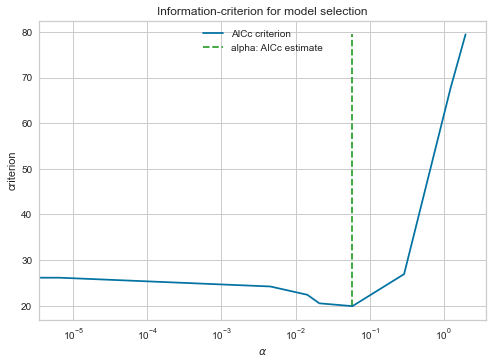

In [197]:
plot_ic(table_ic(X_train, y_train))

In [198]:


clf10 = linear_model.Lasso(alpha=0.05879449551202336, max_iter = 10000)
clf10.fit(X_train, y_train)

print("The model score for AICc optimal alpha and for 80% test data = {}".format(clf10.score(X_test, y_test, sample_weight=None)))

The model score for AICc optimal alpha and for 80% test data = 0.787162012969411


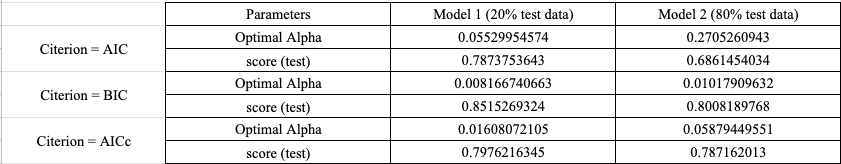

### Explanation of the calculation of alpha ###

For every criterion, we calculate the value of the criterion for a range of values of alpha and then we take the alpha which minimizes the value of thet criterion. 

## QUESTION 3 <a class="anchor" id="first-bullet"></a>

### Linear regression with cross validations ###


In [199]:
X = data.loc[:, data.columns !=  'mpg']
Y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 21)


In [200]:
### running initial test with linear regression ###

lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.836359558609795

In [201]:
### Running CV and printing score for all 10 models ###

In [202]:
### 10 fold cross validation ###

nrows = len(list(X.index))

fold_length = round(nrows/10)

fold = 1

while fold <= 10:
    
    X_select = X.index.isin(range((fold-1)*fold_length, (fold)*fold_length))
    
    X_test = X[~X_select]
    X_train = X[X_select]
    
    y_select = Y.index.isin(range((fold-1)*fold_length, (fold)*fold_length))
    
    y_test = Y[~y_select]
    y_train = Y[y_select]
    
    
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    
    yhat = lm.predict(X_train)
    SS_Residual = sum((y_train-yhat)**2)       
    SS_Total = sum((y_train-np.mean(y_train))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
    print("Fold =", fold)
    print("R Squared =", r_squared)
    print( "Adj.rsquared = ",adjusted_r_squared)
    print("Score =", lm.score(X_test, y_test))
    print("\n")
    
    fold += 1
    

Fold = 1
R Squared = 0.9355044340062391
Adj.rsquared =  0.9188604169755911
Score = -0.3450520477246175


Fold = 2
R Squared = 0.9355310398842849
Adj.rsquared =  0.918893888886681
Score = -7.982061144793892


Fold = 3
R Squared = 0.9142157280789633
Adj.rsquared =  0.8920778514541797
Score = -19.8229079359106


Fold = 4
R Squared = 0.8993092732083321
Adj.rsquared =  0.8733245695201597
Score = -1.0245632537866936


Fold = 5
R Squared = 0.9133406393814999
Adj.rsquared =  0.8909769334154354
Score = 0.061166384851526034


Fold = 6
R Squared = 0.91984512324006
Adj.rsquared =  0.8991599937536239
Score = 0.02463186849336063


Fold = 7
R Squared = 0.8538655293853901
Adj.rsquared =  0.8161534079364585
Score = -0.3834934898988098


Fold = 8
R Squared = 0.8890233548320342
Adj.rsquared =  0.8603842205951399
Score = 0.6924706305672294


Fold = 9
R Squared = 0.650900998957799
Adj.rsquared =  0.5608109341727148
Score = -8.986870220542983


Fold = 10
R Squared = 0.7348307447950433
Adj.rsquared =  0.6616

### comment on the R2  and the prediction score of each fold ###

We can clearly see from the bove results that as the R squared increases, the score decreases which means that 
the bias decreases as we increase Adj. r2. We have to keep in mind that the the Adj. R2 is not too high as to 
result in over-fitting and hence, decreasing bias but increasing variance. This is why CV is useful as it helps average
over all the good and bad subsets of our data set and give us an averaged out value. 

## QUESTION 4 <a class="anchor" id="first-bullet"></a>

### Discussion about AIC, BIC and AICC values ###

The value of BIC can be higher than AIC value for different combinations of AIC and BIC. For each of the information criterion measure, model 1 with 20% test data is better asit has lower values. In this case the BIC values are always higher than the AIC values as it penalizes more. The calculation for these valus are done along with the calculation of the score in question 1. The trend might differ if we standardize all the columns, which is the case here. AICc values are also different from AIC as it corrects for the low saample size. Since, our sample data doesn't suffer from that issue, the AIC and AICc values are nearly similar. 

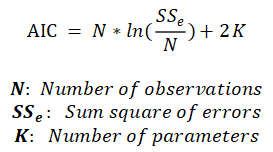

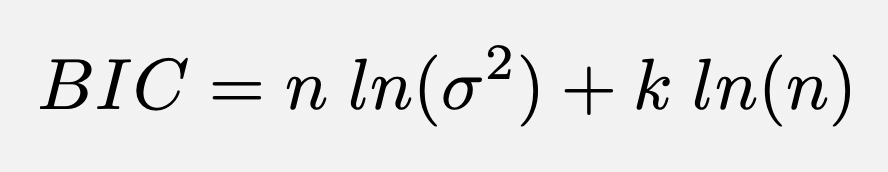

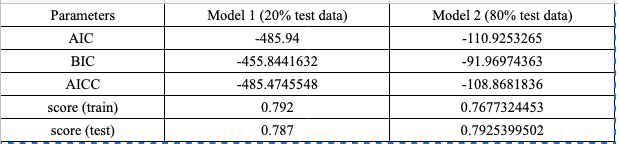

## QUESTION 5 <a class="anchor" id="first-bullet"></a>

### Randomized cntrol trials ###

Randomized controls are statistical experiemnt designs in which we randomize the process of allocation of treatment or control tp the engagement units. Engagement units are individuals or group of individuals, which we will be assigning treatment or control. Treatmnet is the change for which we want to measure the effect on our population. Control is he null hypotheses or the norm. 

### A/B testing ##

A/B testing a kind of statistical experiment design in which we compare control to another treatment in a completely randomized way. This is a replacement for the fact that we can't observe the same individual under treatment first and then under control, or vice-versa. This has been widely used in real worls, mostly to determine if the new feature being introduced on the website or app is producing the desired results. 

### Methods to analyze RCT data ##

There are various ways to analyze RCT:

1. Since, it's completely randomized, we don't have to account for confounding variables. We can run a linear regression to understand the effect treatment is having on our dependent variable. 

2. We can run a chi-squared test to compare two or more than two populations and make inference, based on our Null hypotheses. 